In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('boilerplate-medical-data-visualizer\medical_examination.csv', index_col=0)

In [34]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df['overweight'] = ((df['weight'] / ((df['height'] / 100) ** 2)) > 25).astype(int)

In [38]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

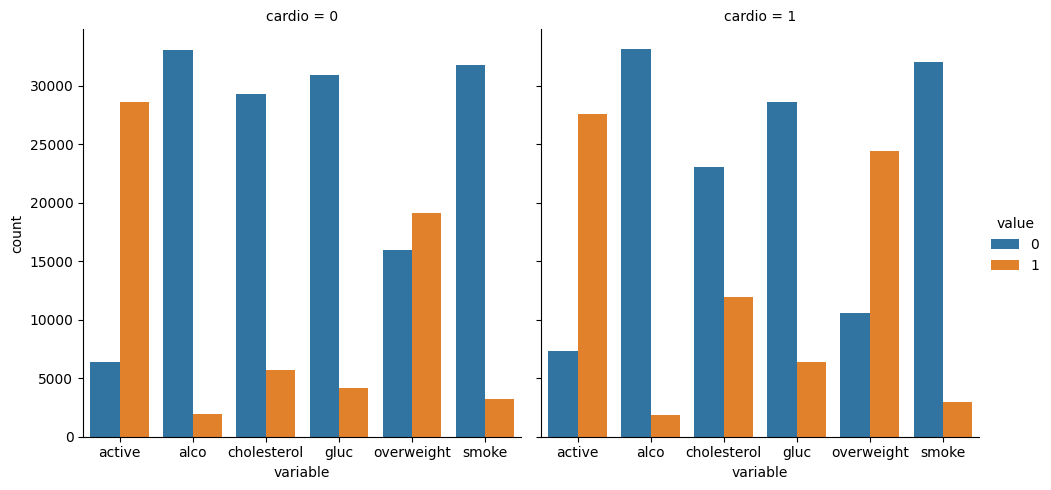

In [ ]:
def draw_cat_plot():
    # Prepare data for categorical plot
    df_cat = pd.melt(
        df,
        id_vars=['cardio'],
        value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
    )

    # Group and reformat the data to split it by 'cardio'
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='count')

    # Draw the catplot with 'sns.catplot()'
    g = sns.catplot(
        x='variable',
        y='count',
        hue='value',
        col='cardio',
        data=df_cat,
        kind='bar'
    )

    # Get the figure for output
    fig = g.fig

    fig.savefig('catplot.png')
    return fig

# To display the plot in Jupyter Notebook
fig = draw_cat_plot()
plt.show()


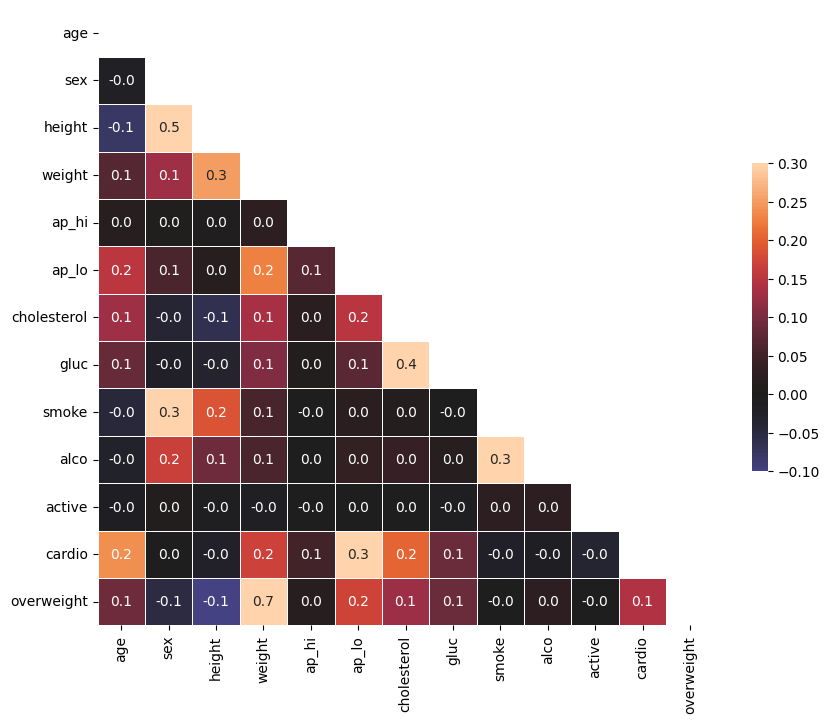

In [ ]:
def draw_heat_map():
    df_heat = df[
            (df['ap_lo'] <= df['ap_hi']) &
            (df['height'] >= df['height'].quantile(0.025)) &
            (df['height'] <= df['height'].quantile(0.975)) &
            (df['weight'] >= df['weight'].quantile(0.025)) &
            (df['weight'] <= df['weight'].quantile(0.975))
        ]

    corr = df_heat.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        corr,
        mask=mask,
        annot=True,
        fmt=".1f",
        center=0,
        vmax=0.3,
        vmin=-0.1,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
        ax=ax
    )
    fig.savefig('heatmap.png')
    return fig
fig = draw_heat_map()
plt.show()